In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from sklearn import datasets, svm, cross_validation, tree, preprocessing, metrics
import sklearn.ensemble as ske

In [11]:
# Importing the dataset
titanic_df = pd.read_excel('titanic3.xls', 'titanic3', index_cols=None, na_values=['NA'])
titanic_df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [12]:
# Checking the overall status of survival
# Turns out that only 38% of people survived the disaster
titanic_df['survived'].mean()

0.3819709702062643

In [16]:
# Grouping passengers by classes to get a fine view
class_sex_grouping = titanic_df.groupby(['pclass', 'sex']).mean()
class_sex_grouping

survived        age     sibsp     parch        fare        body
pclass sex                                                                    
1      female  0.965278  37.037594  0.555556  0.472222  109.412385         NaN
       male    0.340782  41.029250  0.340782  0.279330   69.888385  162.828571
2      female  0.886792  27.499191  0.500000  0.650943   23.234827   52.000000
       male    0.146199  30.815401  0.327485  0.192982   19.904946  171.233333
3      female  0.490741  22.185307  0.791667  0.731481   15.324250  183.000000
       male    0.152130  25.962273  0.470588  0.255578   12.415462  151.854167

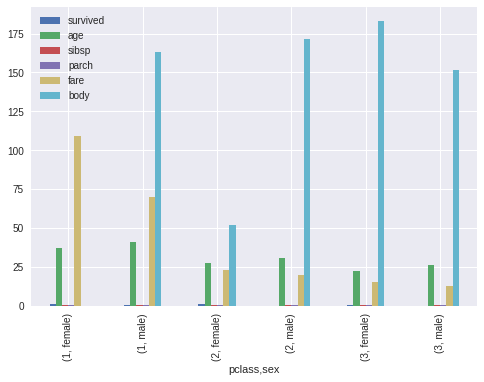

In [19]:
# Visualising the above result
class_sex_grouping.plot.bar()

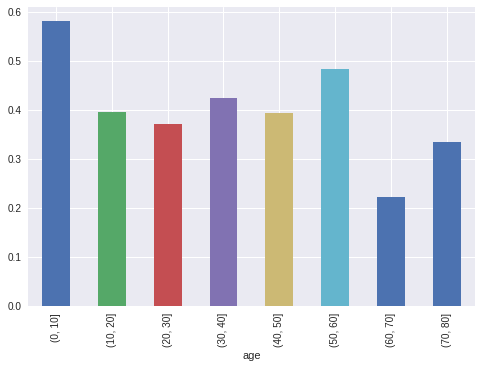

In [24]:
# Visualising by grouping according to age
grouping_by_age = pd.cut(titanic_df['age'], np.arange(0, 90, 10))
age_grouping = titanic_df.groupby(grouping_by_age).mean()
age_grouping['survived'].plot.bar()

In [25]:
# Cleaning the data
# Get the count of values in dataset
titanic_df.count()

pclass       1309
survived     1309
name         1309
sex          1309
age          1046
sibsp        1309
parch        1309
ticket       1309
fare         1308
cabin         295
embarked     1307
boat          486
body          121
home.dest     745
dtype: int64

In [0]:
# Remove unwanted columns like body, cabin, boat
titanic_df = titanic_df.drop(['body', 'cabin', 'boat'], axis = 1)

# Remove missing values from home.dest
titanic_df['home.dest'] = titanic_df['home.dest'].fillna('NA')
titanic_df = titanic_df.dropna()

In [28]:
# Get the count of values in dataset after removing missing values
titanic_df.count()

pclass       1043
survived     1043
name         1043
sex          1043
age          1043
sibsp        1043
parch        1043
ticket       1043
fare         1043
embarked     1043
home.dest    1043
dtype: int64

In [0]:
# Preprocess the remaining data
def preprocess_titanic_df(df):
  processed_df = df
  le = preprocessing.LabelEncoder()
  processed_df.sex = le.fit_transform(processed_df.sex)
  processed_df.embarked = le.fit_transform(processed_df.embarked)
  processed_df = processed_df.drop(['name', 'ticket', 'home.dest'], axis = 1)
  return processed_df

processed_df = preprocess_titanic_df(titanic_df)

In [0]:
# Splitting dataset into test and train
X = processed_df.drop(['survived'], axis = 1).values
y = processed_df['survived'].values
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size = 0.2)

In [34]:
# Building a decision tree model
model_dt = tree.DecisionTreeClassifier(max_depth=10)
model_dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [36]:
# Using a shuffle validator to test the accuracies of different models
shuffle_validator = cross_validation.ShuffleSplit(len(X), n_iter = 20, test_size = 0.2, random_state = 0)
def test_classifier(clf):
  scores = cross_validation.cross_val_score(clf, X, y, cv = shuffle_validator)
  print("Accuracy: %0.4f (+/- %0.2f)" % (scores.mean(), scores.std()))
  
# Testing Decision Tree Classifier
test_classifier(model_dt)

Accuracy: 0.7749 (+/- 0.02)


In [37]:
# Testing Random Forest Classifier
model_rf = ske.RandomForestClassifier(n_estimators = 50)
test_classifier(model_rf)

Accuracy: 0.7847 (+/- 0.02)


In [38]:
# Testing Gradient Boosting Classifier
model_gb = ske.GradientBoostingClassifier(n_estimators = 50)
test_classifier(model_gb)

Accuracy: 0.8201 (+/- 0.02)


In [44]:
# Using Gradient Boosting Classifier on test data
model_gb.fit(X_train, y_train)
prediction = model_gb.predict(X_test)
prediction

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0])